In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import numpy as np

# read the dataset
data = pd.read_csv('clusters.csv')






In [14]:
stats_summary = data.describe().T 
stats_summary['mean'] = data.mean()
stats_summary['median'] = data.median()
stats_summary['std_dev'] = data.std()
stats_summary['skewness'] = data.skew()
stats_summary['kurtosis'] = data.kurtosis()

# Display the summary statistics
print("Basic Statistics Summary:")
print(stats_summary)


Basic Statistics Summary:
            count    mean        std  min    25%   50%    75%   max  median  \
Hindi      1000.0  51.645  29.471912  0.0  26.00  53.0  77.00  99.0    53.0   
English    1000.0  50.110  28.048505  0.0  26.00  50.5  75.00  99.0    50.5   
Science    1000.0  49.440  28.921114  0.0  25.00  50.0  73.25  99.0    50.0   
Maths      1000.0  49.553  28.632447  0.0  25.75  49.0  74.00  99.0    49.0   
History    1000.0  49.034  28.769750  0.0  24.00  49.0  73.25  99.0    49.0   
Geography  1000.0  50.028  28.710268  0.0  26.00  49.0  75.00  99.0    49.0   
Cluster    1000.0   1.937   1.459164  0.0   1.00   2.0   3.00   4.0     2.0   

             std_dev  skewness  kurtosis  
Hindi      29.471912 -0.102165 -1.223356  
English    28.048505 -0.038922 -1.175466  
Science    28.921114  0.008994 -1.178566  
Maths      28.632447  0.023555 -1.192734  
History    28.769750  0.030952 -1.169629  
Geography  28.710268 -0.008680 -1.215502  
Cluster     1.459164  0.041730 -1.353444

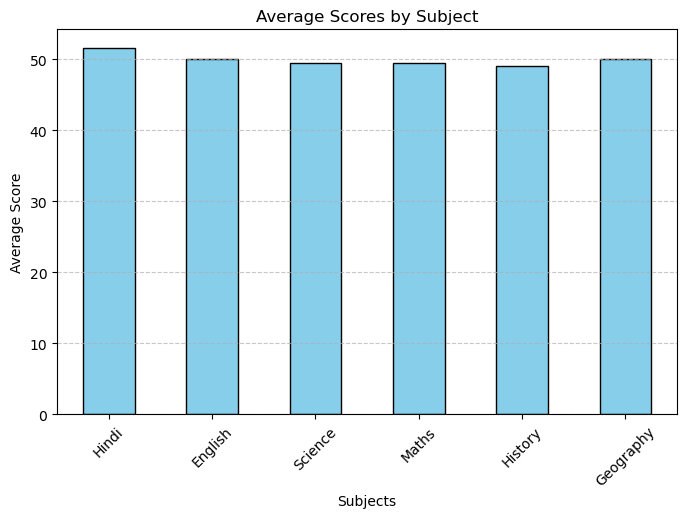

In [2]:
# code  for a bar chart
def plot_bar_chart(data):
    """
    Creates a bar chart showing the average scores for each subject.

   
    """
    avg_scores = data.mean().drop("Cluster")
    avg_scores.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='k')
    plt.title("Average Scores by Subject")
    plt.ylabel("Average Score")
    plt.xlabel("Subjects")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot_bar_chart(data)


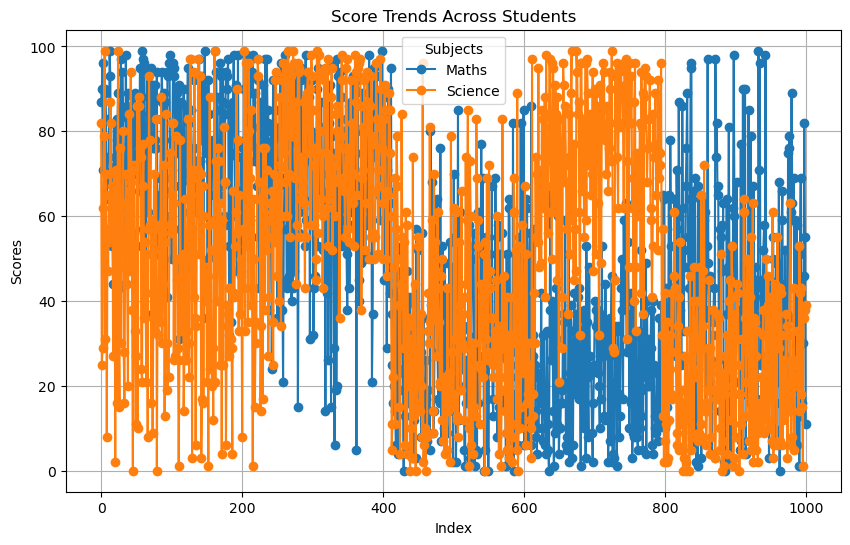

In [3]:

# Function for a line plot
def plot_line_trends(data, columns):
    """
    Creates a line plot showing trends of scores for selected subjects.

    """
    data[columns].plot(figsize=(10, 6), linestyle='-', marker='o')
    plt.title("Score Trends Across Students")
    plt.xlabel("Index")
    plt.ylabel("Scores")
    plt.legend(title="Subjects")
    plt.grid(True)
    plt.show()
plot_line_trends(data, ['Maths', 'Science'])

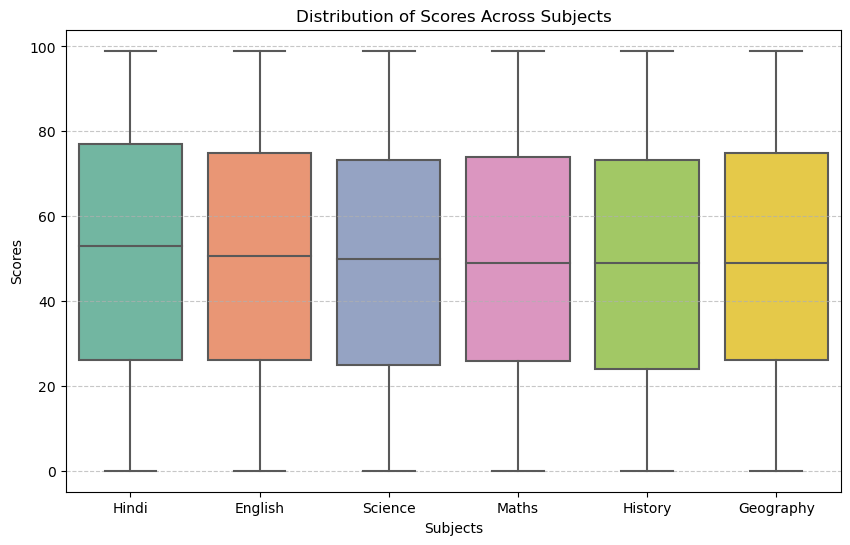

In [4]:
# Function for a box plot
def plot_box_plot(data):
    """
    Creates a box plot for the scores of all subjects.

    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data.drop(columns="Cluster"), palette="Set2")
    plt.title("Distribution of Scores Across Subjects")
    plt.xlabel("Subjects")
    plt.ylabel("Scores")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot_box_plot(data)  # Box plot for scores



C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


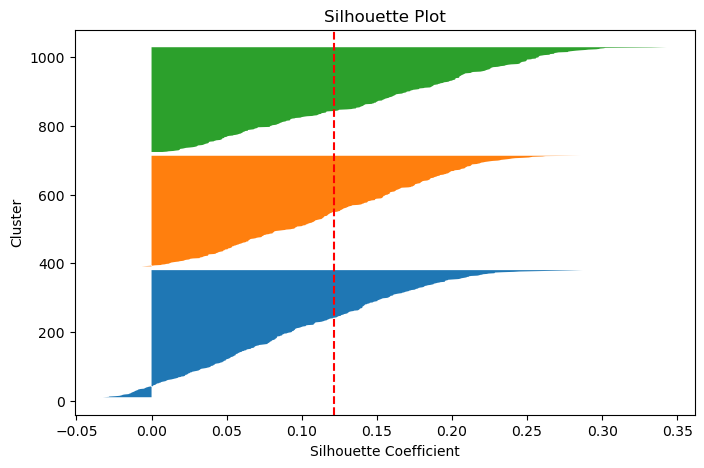

In [5]:

# Function for a silhouette plot
def plot_silhouette(data, n_clusters):
    """
    Code for a silhouette plot for the k-means clustering.


    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_vals = silhouette_samples(data, labels)
    y_lower = 10
    
    plt.figure(figsize=(8, 5))
    for i in range(n_clusters):
        ith_cluster_silhouette = silhouette_vals[labels == i]
        ith_cluster_silhouette.sort()
        size_cluster = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_cluster
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette)
        y_lower = y_upper + 10

    plt.title("Silhouette Plot")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.show()
plot_silhouette(data.drop(columns="Cluster"), n_clusters=3)


C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


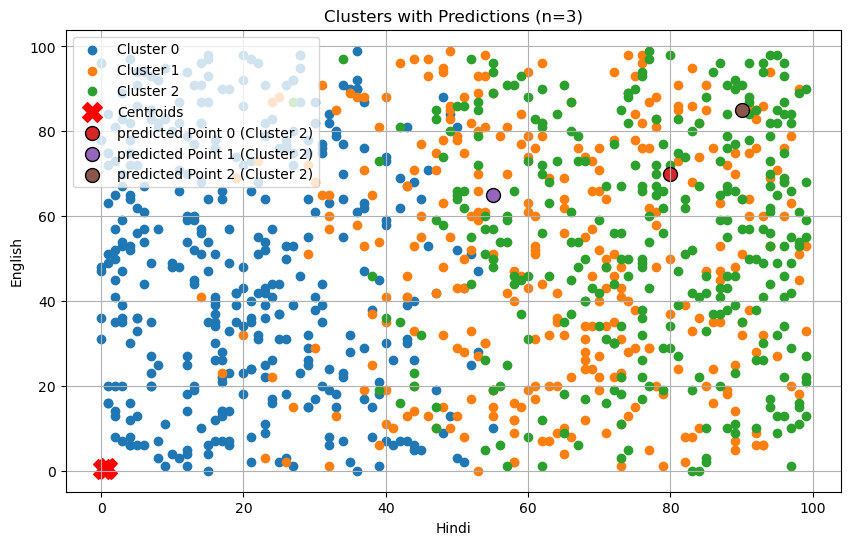

Silhouette Score for 3 clusters: 0.12
predicted clusters:
Point 0: [80 70 60 90 50 40] -> Cluster 2
Point 1: [55 65 75 85 60 45] -> Cluster 2
Point 2: [90 85 80 95 75 65] -> Cluster 2


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# code for normalization, back-scaling, and predictions
def clustering_with_pred(data, n_clusters, new_points):
    """
    Performs k-means clustering on normalized data and predicts clusters for randomly taken data points.

    """
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    
    # Back-scale data for presentation
    clustered_data = pd.DataFrame(scaler.inverse_transform(normalized_data), columns=data.columns)
    clustered_data['Cluster'] = labels
    
    # Predict clusters for new data points
    normalized_new_points = scaler.transform(new_points)
    predicted_labels = kmeans.predict(normalized_new_points)
    back_scaled_points = scaler.inverse_transform(normalized_new_points)
    
    # Plot the clusters and predictions
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f"Cluster {cluster}")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Plot new points with predictions
    for i, point in enumerate(back_scaled_points):
        plt.scatter(point[0], point[1], label=f"predicted Point {i} (Cluster {predicted_labels[i]})", edgecolor='k', s=100)
    
    plt.title(f"Clusters with Predictions (n={n_clusters})")
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display silhouette score
    silhouette_avg = silhouette_score(normalized_data, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")
    
    return clustered_data, predicted_labels

# New data points for prediction (3+ points)
points = np.array([
    [80, 70, 60, 90, 50, 40],  # Example point 1
    [55, 65, 75, 85, 60, 45],  # Example point 2
    [90, 85, 80, 95, 75, 65]   # Example point 3
])

# Perform clustering and include predictions for new points
clustered_data, predicted_labels = clustering_with_pred(data.drop(columns="Cluster"), n_clusters=3, new_points=points)

print("predicted clusters:")
for i, label in enumerate(predicted_labels):
    print(f"Point {i}: {points[i]} -> Cluster {label}")


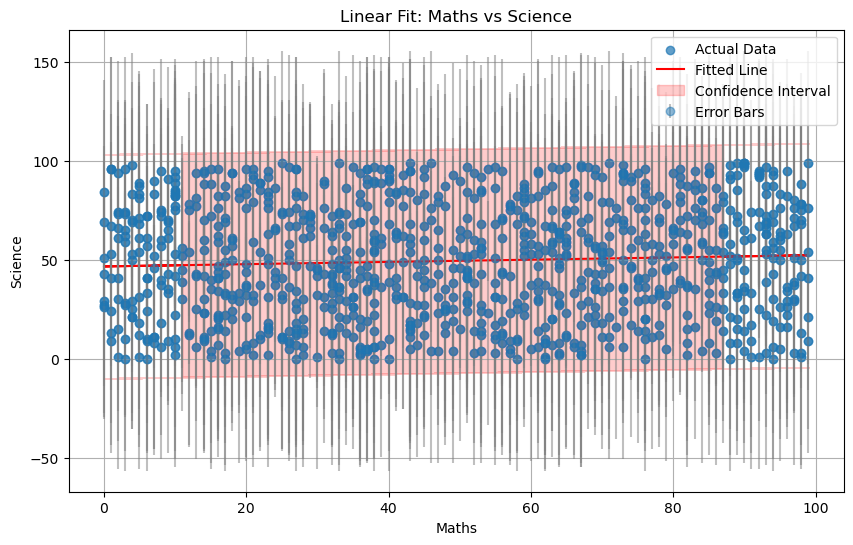

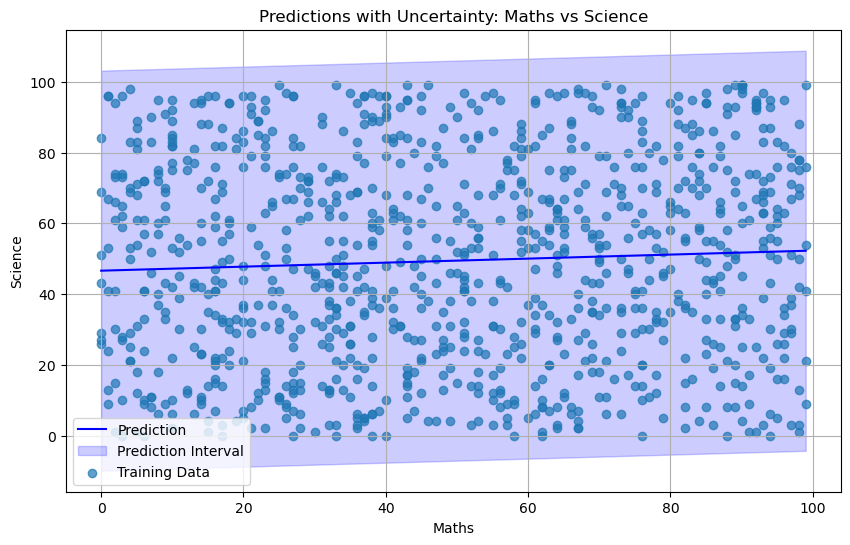

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function for fitting with predictions, confidence intervals, and error bars
def perform_fitting(data, x_col, y_col):
    """
    code for regression that plots best fit and some sample daat to predict with error bars
    
    """
    x = data[[x_col]].values
    y = data[y_col].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Generate confidence intervals
    residuals = y - y_pred
    std_error = np.std(residuals)
    conf_interval = 1.96 * std_error  # 95% confidence interval

    # Plot data, predictions, and error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Actual Data', alpha=0.7)
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    plt.fill_between(x.flatten(), (y_pred - conf_interval), (y_pred + conf_interval), color='red', alpha=0.2, label='Confidence Interval')
    plt.errorbar(x.flatten(), y, yerr=conf_interval, fmt='o', ecolor='gray', alpha=0.5, label='Error Bars')
    plt.title(f"Linear Fit: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predictions with uncertainties
    new_x = np.linspace(x.min(), x.max(), 10).reshape(-1, 1)
    new_y_pred = model.predict(new_x)
    new_y_upper = new_y_pred + conf_interval
    new_y_lower = new_y_pred - conf_interval

    # Plot predictions with uncertainties
    plt.figure(figsize=(10, 6))
    plt.plot(new_x, new_y_pred, label='Prediction', color='blue')
    plt.fill_between(new_x.flatten(), new_y_lower, new_y_upper, color='blue', alpha=0.2, label='Prediction Interval')
    plt.scatter(x, y, alpha=0.7, label='Training Data')
    plt.title(f"Predictions with Uncertainty: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform fitting on two chosen variables
perform_fitting(data, x_col='Maths', y_col='Science')
